In [2]:
import pandas as pd
import pickle
from sequenzo import * 

In [4]:
detailed_df = pd.read_csv('/Users/lei/Library/CloudStorage/OneDrive-Nexus365/sequenzo/test_data/real_data_my_paper/detailed_sequence_10_work_years_df.csv')
    
detailed_df

,worker_id,gender,country,cohort,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,dilip-kumar-nath-7538746a,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
1,vinodkumar-yadav-b7a976107,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
2,josh-slosson-07a1509,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
3,jonatthan-rodriguez-8a5612121,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
4,jeenesh-jyothindran-8ba28818,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38897,nan-jiang-743a9863,female,us,0-10 total work years,software,software,software,software,software,software,software,software,software,software
38898,tina-pava-4846207,female,us,21-30 total work years,software,software,software,software,software,software,software,software,software,software
38899,sariandoni,female,us,21-30 total work years,support & test,software,software,software,software,software,software,research,research,research
38900,nancy-jain-a8723460,female,us,0-10 total work years,software,software,software,software,software,support & test,software,software,software,software


In [22]:
detailed_df = detailed_df[['worker_id', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10']]
_time = list(df.columns)[4:]
states = ['data', 'data & intensive math', 'hardware', 'research', 'software', 'software & hardware', 'support & test']
    
detailed_data = SequenceData(df, time=_time, time_type="age", id_col="worker_id", states=states)


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 38902
[>] Min/Max sequence length: 7 / 7
[>] Alphabet: ['data', 'data & intensive math', 'hardware', 'research', 'software', 'software & hardware', 'support & test']


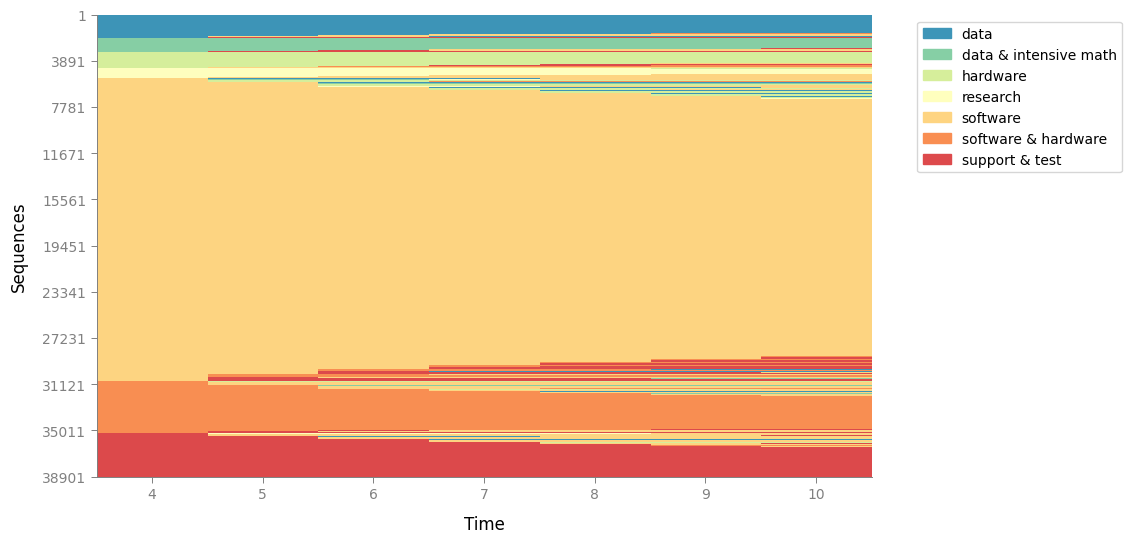

In [24]:
plot_sequence_index(detailed_data, save_as='detailed_data_index_plot')

## Dissimilarity measures

In [26]:
# 很快，OMspell sm=TRATE 51秒做完, 没必要做 trate，因为转换的人太少了，所以还不如直接 sm
# 不用 sm=TRATE 的话 41s 能跑完

detailed_distance_matrix = get_distance_matrix(seqdata=detailed_data, 
                                               method="OMspell", 
                                               sm="CONSTANT", 
                                               indel=1, 
                                               expcost=1)

detailed_distance_matrix

[!] cpu_affinity() not supported on this platform. Skipping...
[>] Processing 38902 sequences with 7 unique states.
  - Creating 8x8 substitution-cost matrix using 2 as constant value
[>] Indel cost generated.
[>] Identified 1193 unique spell sequences.
[>] Sequence spell length: min/max = 1 / 5.

[>] Starting Optimal Matching with spell(OMspell)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


,dilip-kumar-nath-7538746a,vinodkumar-yadav-b7a976107,josh-slosson-07a1509,jonatthan-rodriguez-8a5612121,jeenesh-jyothindran-8ba28818,sudheer-kumar-75834285,vinod-chavan-6ab338ab,satish-b-0a25b929,krishal-krishna-shetty-475397101,gurinder-singh-716792b8,...,layamrudhaa-venkatesan-51036b29,sowmiya-srinivasan-503511137,yelena-wu-a2a2332a,jakhani,michelle-elder,nan-jiang-743a9863,tina-pava-4846207,sariandoni,nancy-jain-a8723460,christy-garner-677894213
dilip-kumar-nath-7538746a,0.0,0.0,0.0,0.0,0.0,0.0,4.0,8.0,0.0,14.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,6.0,6.0,14.0
vinodkumar-yadav-b7a976107,0.0,0.0,0.0,0.0,0.0,0.0,4.0,8.0,0.0,14.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,6.0,6.0,14.0
josh-slosson-07a1509,0.0,0.0,0.0,0.0,0.0,0.0,4.0,8.0,0.0,14.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,6.0,6.0,14.0
jonatthan-rodriguez-8a5612121,0.0,0.0,0.0,0.0,0.0,0.0,4.0,8.0,0.0,14.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,6.0,6.0,14.0
jeenesh-jyothindran-8ba28818,0.0,0.0,0.0,0.0,0.0,0.0,4.0,8.0,0.0,14.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,6.0,6.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nan-jiang-743a9863,0.0,0.0,0.0,0.0,0.0,0.0,4.0,8.0,0.0,14.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,6.0,6.0,14.0
tina-pava-4846207,0.0,0.0,0.0,0.0,0.0,0.0,4.0,8.0,0.0,14.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,6.0,6.0,14.0
sariandoni,6.0,6.0,6.0,6.0,6.0,6.0,6.0,8.0,6.0,14.0,...,6.0,6.0,6.0,6.0,8.0,6.0,6.0,0.0,6.0,14.0
nancy-jain-a8723460,6.0,6.0,6.0,6.0,6.0,6.0,6.0,8.0,6.0,12.0,...,6.0,6.0,6.0,6.0,8.0,6.0,6.0,6.0,0.0,12.0


In [7]:
# TODO: 分层聚类 Ward



array([[ 0.        ,  0.        ,  0.        , ...,  7.62148399,
         1.94590737, 19.4590737 ],
       [ 0.        ,  0.        ,  0.        , ...,  7.62148399,
         1.94590737, 19.4590737 ],
       [ 0.        ,  0.        ,  0.        , ...,  7.62148399,
         1.94590737, 19.4590737 ],
       ...,
       [ 7.62148399,  7.62148399,  7.62148399, ...,  0.        ,
         7.67221978, 13.97650213],
       [ 1.94590737,  1.94590737,  1.94590737, ...,  7.67221978,
         0.        , 17.51316633],
       [19.4590737 , 19.4590737 , 19.4590737 , ..., 13.97650213,
        17.51316633,  0.        ]])

## Broad df

In [14]:
sequence_output_file_path = '/Users/lei/Library/CloudStorage/OneDrive-Nexus365/yuqi_dphil/output/occupational_segregation_paper/sequence_analysis'

broad_df = pd.read_csv(f'{sequence_output_file_path}/sequence_visualization/broad_sequence_df_5_years_or_more.csv')

broad_df

,worker_id,gender,country,cohort,C1,C2,C3,C4,C5
0,upendra-prakash-3845481a1,male,india,0-10 total work years,Technical computing,Technical computing,Non-computing,Non-computing,Non-computing
1,chandrajit-bhattacharya-927891b6,male,india,0-10 total work years,Non-computing,Non-computing,Technical computing,Technical computing,Technical computing
2,basant-singh-99269834,male,india,0-10 total work years,Non-computing,Non-computing,Non-computing,Non-computing,Technical computing
3,dhanush-dhama-52389644,male,india,0-10 total work years,Non-computing,Non-computing,Non-computing,Non-computing,Technical computing
4,kalpataru-samanta-66a5a5222,male,india,0-10 total work years,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing
...,...,...,...,...,...,...,...,...,...
373754,jhansi-lakshmi-2694ba49,female,us,0-10 total work years,Non-technical computing,Non-technical computing,Non-technical computing,Technical computing,Technical computing
373755,amal-morais-0b8336155,female,us,0-10 total work years,Non-computing,Non-computing,Non-computing,Technical computing,Technical computing
373756,christy-garner-677894213,female,us,21+ total work years,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing
373757,jagadevichikkalli,female,us,11-20 total work years,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing


In [15]:
broad_df['country'].value_counts()

country
india    219563
us       154196
Name: count, dtype: int64

In [16]:
broad_df = broad_df[['worker_id', 'C1', 'C2', 'C3', 'C4', 'C5']]
broad_time = list(broad_df.columns)[4:]
broad_states = ['Non-computing', 'Non-technical computing', 'Technical computing']
    
# get distance matrix
broad_data = SequenceData(broad_df, 
                          time=broad_time, 
                          time_type="age", 
                          id_col="worker_id", 
                          states=broad_states)

broad_data


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 373759
[>] Min/Max sequence length: 2 / 2
[>] Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing']


SequenceData(373759 sequences, Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing'])

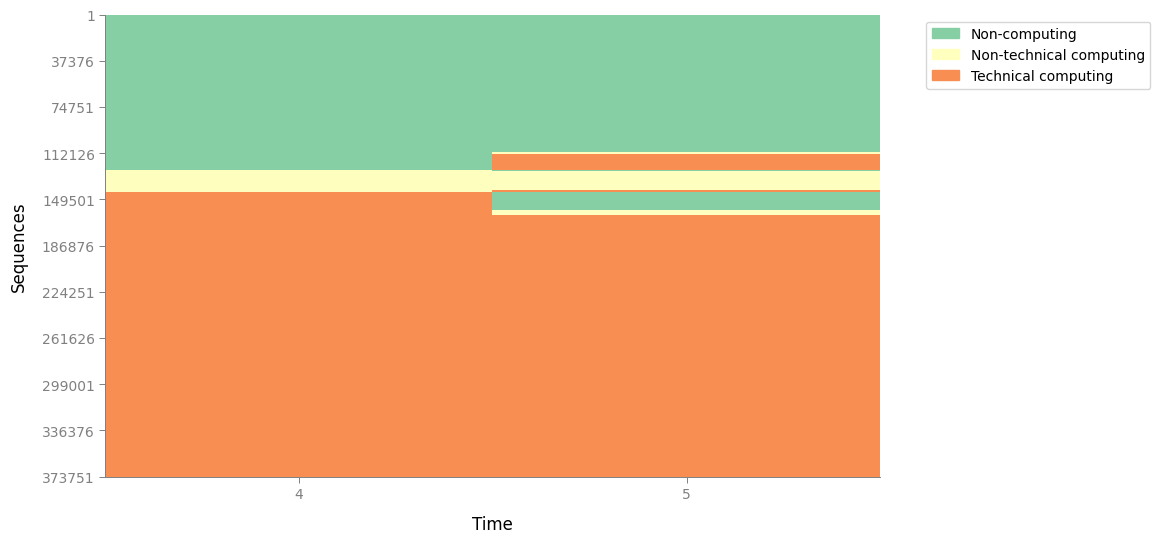

In [17]:
plot_sequence_index(broad_data, save_as='broad_data_index_plot')

## 10 years

In [18]:
sequence_output_file_path = '/Users/lei/Library/CloudStorage/OneDrive-Nexus365/yuqi_dphil/output/occupational_segregation_paper/sequence_analysis'

broad_10_df = pd.read_csv(f'{sequence_output_file_path}/sequence_visualization/broad_sequence_df_10_years_or_more.csv')

broad_10_df

,worker_id,gender,country,cohort,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,dilip-kumar-nath-7538746a,male,india,11-20 total work years,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing
1,munish-bansal-4a984771,male,india,11-20 total work years,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing
2,aashish-jain-06449730,male,india,11-20 total work years,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing
3,sumit-kumar-ab581a15b,male,india,0-10 total work years,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing
4,vinodkumar-yadav-b7a976107,male,india,11-20 total work years,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166420,tutku-govsa,female,us,21+ total work years,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Non-technical computing,Non-technical computing,Non-technical computing
166421,saidivya-kakuturu-782a335b,female,us,11-20 total work years,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Non-technical computing,Non-technical computing
166422,greeshma-malgireddy-86aa78a,female,us,11-20 total work years,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing
166423,christy-garner-677894213,female,us,21+ total work years,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing


In [19]:
broad_10_df = broad_10_df[['worker_id', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10']]
broad_10_years_time = list(broad_10_df.columns)[4:]
broad_states = ['Non-computing', 'Non-technical computing', 'Technical computing']
    
# get distance matrix
broad_10_data = SequenceData(broad_10_df, 
                             time=broad_10_years_time, 
                             time_type="age", 
                             id_col="worker_id", 
                             states=broad_states)

broad_10_data


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 166425
[>] Min/Max sequence length: 7 / 7
[>] Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing']


SequenceData(166425 sequences, Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing'])

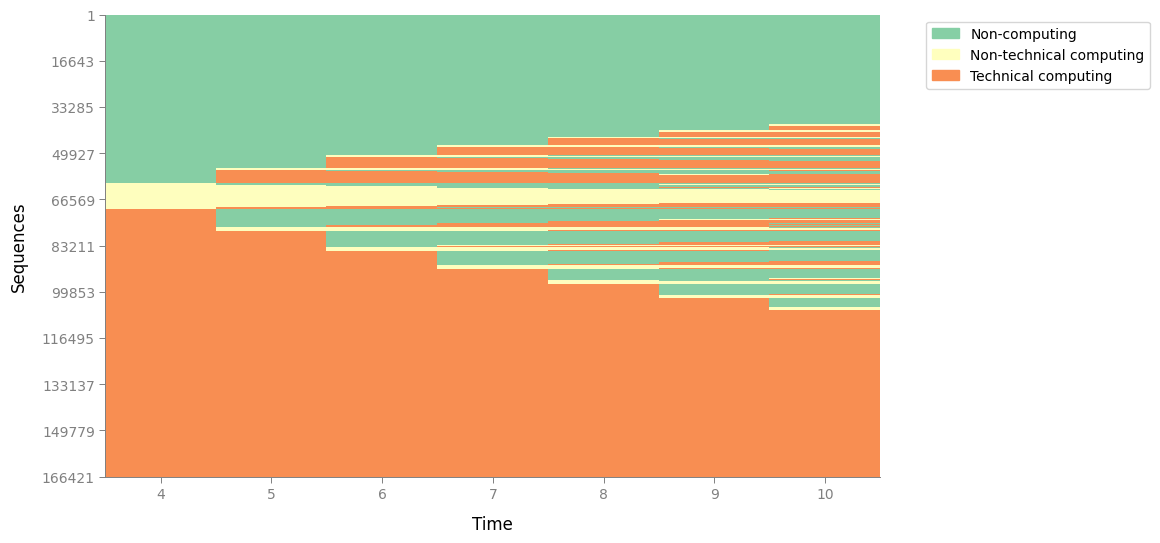

In [20]:
plot_sequence_index(broad_10_data, save_as='broad_data_10_years_index_plot')